# Machine Learning -- Linear Models

မင်္ဂလာပါ၊ အခု week 10 မှာ Linear Models တွေကို လေ့လာကြမှာ ဖြစ်တယ်။

![Data Science Venn Diagram](https://i.ibb.co/4NpbV0C/data-science.png)

> ဒီအပါတ်ကစပြီး သင်္ချာပါဝင်မှုက အရင် အပါတ်တွေနဲ့စာရင် လျော့သွားတာကို တွေ့ရလိမ့်မယ်။

> ဒါပေမဲ့ သုညအထိတော့ ပျောက်မသွားဘူး။

**Machine Learning** ဆိုတာ **model** ဆောက်တာပဲလို့ အလွယ်ပြောလို့ရတယ်။ 

## **model** ကို ဘာအတွက် ဆောက်ကြတာလဲ၊ ဘယ်လို ဆောက်ကြတာလဲ။

In [ ]:
%git clone https://github.com/neolaw84/data_science_using_python_labs.git
cd data_science_using_python_labs/week10

In [8]:
from utils import load_boston_dataset
df_boston = load_boston_dataset()
df_boston.head()
# up to this point is what we have seen before

dict_keys(['CRIM', 'ZN', 'INDU', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRA', 'B', 'LSTA', 'MEDV'])


,CRIM,ZN,INDU,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRA,B,LSTA,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# simple imports
import pandas as pd
from sklearn import model_selection as sk_ms
from sklearn import linear_model as sk_lm
from sklearn import preprocessing as sk_pr

# we have seen values of DataFrame to get numpy arrays; nothing new
X_bst = df_boston[[c for c in df_boston.columns if c != "MEDV"]].values
y_bst = df_boston.MEDV.values

# splitting data into train and test
X_bst_tr, X_bst_ts, y_bst_tr, y_bst_ts = sk_ms.train_test_split(X_bst, y_bst, test_size=0.10)

# building the model; check closely these 3 lines
linear_regression_model = sk_lm.LinearRegression()
linear_regression_model.fit(X_bst_tr, y_bst_tr)
y_bst_pred = linear_regression_model.predict(X_bst_ts)

# building the prediction dataframe for analysis
df_bst_pred = pd.DataFrame({"actual_medv": y_bst_ts, "pred_medv": y_bst_pred, "diff_medv": y_bst_pred - y_bst_ts})
df_bst_pred.head(n=10)

,actual_medv,pred_medv,diff_medv
0,27.5,19.130442,-8.369558
1,24.4,23.670128,-0.729872
2,16.8,20.496308,3.696308
3,48.5,40.643396,-7.856604
4,17.5,18.765114,1.265114
5,41.3,32.802517,-8.497483
6,19.8,22.046991,2.246991
7,19.1,24.270751,5.170751
8,27.0,32.437626,5.437626
9,50.0,32.271606,-17.728394


* **model** တခုကို ဆောက်တယ်ဆိုတာ **function** တခုကို တည်ဆောက်တာပါပဲ။ တနည်းအားဖြင့် function တခုကို လိုချင်လို့ ဆောက်တာ ဖြစ်တယ်။

* model တခုကို တည်ဆောက်ရာမှာ ...
  * function ရဲ့ ***formula*** က အသေကြီး ရှိနေတယ်။ 
  * အဲဒါကိုလဲ **model** လို့ ခေါ်ပြီး 
  * သူ့ထဲထည့်ရတဲ့ **variable** ဂဏန်း အပြောင်းအလဲလေးတွေကို **model parameter** (`coef`) လို့ ခေါ်တယ်။ 
  * **performance** ကောင်းတဲ့ model တခုရလာဖို့ model parameter တွေကို ချိန်ညှိပေးရတယ်။
  * ဒီလို ချိန်ညှိပေးတဲ့ algorithm ကို **training function** (`fit`) လို့ ခေါ်ပြီး 
  * training function ထဲ ထည့်ရတဲ့ parameter တွေကို **hyper parameter** လို့ ခေါ်တယ်။

## model တခုရဲ့ performance ကောင်းတယ်၊ မကောင်းဘူးကို ဘယ်လိုတိုင်းမလဲ။

In [11]:
from sklearn import metrics as sk_met

print ("max error : ")
print (sk_met.max_error(y_bst_ts, y_bst_pred))
print ("mean absolute error")
print (sk_met.mean_absolute_error(y_bst_ts, y_bst_pred))
print ("median absolute error")
print (sk_met.median_absolute_error(y_bst_ts, y_bst_pred))
print ("mean square error : ")
print (sk_met.mean_squared_error(y_bst_ts, y_bst_pred))
print ("r^2 score : ")
print (sk_met.r2_score(y_bst_ts, y_bst_pred))

max error : 
17.728393743635763
mean absolute error
4.179494457095309
median absolute error
3.6963079138388046
mean square error : 
31.2594824763959
r^2 score : 
0.7679784001002622


* `max_error` ကတော့ အထွေအထူးရှင်းစရာ မရှိပါဘူး။ အများဆုံး error ပေါ့။

* ဒါပေမဲ့ တချို့ error တွေက အနှုတ်ကိန်းတွေလဲ ရှိတယ်ဆိုတော့ အဲဒါတွေပါပါအောင် absolute error ဆိုတာ တွက်ကြတယ်။ အဲဒီ absolute error ကိုမှ `median_absolute_error` နဲ့ `mean_absolute_error` ဆက်တွက်လို့ ရတယ်။

* `mean_square_error` ဆိုတာလဲ အနှုတ်ကိန်းကို ပျောက်အောင် လုပ်တဲ့သဘောပဲ။ ၂ ထပ်တင်လိုက်တာပေါ့။

$$
\text{MSE}(y, \hat{y}) = \frac{1}{m} \sum_{i=0}^{m - 1} (y_i - \hat{y}_i)^2.
$$

* အပေါ်က error metric တွေက နည်းလေ performance ကောင်းလေပဲ။ 

* `r2_score` ကျတော့ နည်းနည်းပိုရှင်းပြမှ ရမယ်။ 

  ပထမဆုံး predict လုပ်မဲ့ target `y` ကို mean နဲ့ ရမ်းရွှီးရင် ရမဲ့ $\text{MSE}(y, \bar{y})$ ကို အရင်ရှာရမယ်။

  $$\text{MSE}(y, \bar{y}) = \frac{1}{m}\sum_{i=1}^{m} (y_i - \bar{y})^2$$

  ပြီးတော့ အဲဒါကို အခြေအဖြစ်တည်ပြီး $\text{MSE}(y, \hat{y})$ ကို သွားစားတယ် (normalize လုပ်တဲ့ သဘောပါပဲ)။ အဲဒီတော့ $\frac{1}{m}$ တွေကျေသွားတယ်။

  နောက်ဆုံး အဲဒီ normalize လုပ်ထား (စားထား) တဲ့ ratio ကို 1 ထဲက နှုတ်လိုက်တယ်။ 

  $$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{m} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{m} (y_i - \bar{y})^2}$$

  **`r2_score` ဟာ 1 နဲ့ နီးလေ ကောင်းလေ၊ 1 ထက်နည်းလေ ညံ့လေပဲ။**

In [12]:
# this is new; check closely these 3 lines
normalizer = sk_pr.Normalizer()
normalizer.fit(X_bst, y_bst) # this does nothing; will explain later
X_bst_norm = normalizer.transform(X_bst)

# splitting data into train and test
X_bst_tr_n, X_bst_ts_n, y_bst_tr, y_bst_ts = sk_ms.train_test_split(X_bst_norm, y_bst, test_size=0.10)

# building the model; check closely these 3 lines
linear_regression_model_2 = sk_lm.LinearRegression()
linear_regression_model_2.fit(X_bst_tr_n, y_bst_tr)
y_bst_pred = linear_regression_model_2.predict(X_bst_ts_n)

# building the prediction dataframe for analysis
df_bst_pred_2 = pd.DataFrame({"actual_medv": y_bst_ts, "pred_medv": y_bst_pred, "diff_medv": y_bst_pred - y_bst_ts})
df_bst_pred_2.head(n=10)

,actual_medv,pred_medv,diff_medv
0,21.9,22.525844,0.625844
1,10.5,14.224529,3.724529
2,15.4,15.121065,-0.278935
3,21.8,19.678329,-2.121671
4,18.9,22.680091,3.780091
5,22.9,20.981644,-1.918356
6,24.3,20.306807,-3.993193
7,28.0,28.731076,0.731076
8,22.7,21.322633,-1.377367
9,17.8,19.665322,1.865322


In [13]:
print ("max error : ")
print (sk_met.max_error(y_bst_ts, y_bst_pred))
print ("mean absolute error")
print (sk_met.mean_absolute_error(y_bst_ts, y_bst_pred))
print ("median absolute error")
print (sk_met.median_absolute_error(y_bst_ts, y_bst_pred))
print ("mean square error : ")
print (sk_met.mean_squared_error(y_bst_ts, y_bst_pred))
print ("r^2 score : ")
print (sk_met.r2_score(y_bst_ts, y_bst_pred))

max error : 
14.823266893264474
mean absolute error
2.6113971596267582
median absolute error
1.918356137553662
mean square error : 
14.988362024297558
r^2 score : 
0.7814011572266304


In [14]:
# building the model; check closely these 3 lines
sgd_model = sk_lm.SGDRegressor(
    penalty="elasticnet", alpha=0.0001, l1_ratio=0.15, max_iter=1000, shuffle=True, random_state=42, learning_rate="invscaling"
)
# penalty can be "l1", "l2" or "elasticnet"
# learning rate can be 'constant', 'optimal', 'invscaling', 'adaptive'
sgd_model.fit(X_bst_tr_n, y_bst_tr)
y_bst_pred = sgd_model.predict(X_bst_ts_n)

# building the prediction dataframe for analysis
df_bst_pred_3 = pd.DataFrame({"actual_medv": y_bst_ts, "pred_medv": y_bst_pred, "diff_medv": y_bst_pred - y_bst_ts})
df_bst_pred_3.head(n=10)

,actual_medv,pred_medv,diff_medv
0,21.9,26.276849,4.376849
1,10.5,18.968407,8.468407
2,15.4,21.888410,6.488410
3,21.8,23.520248,1.720248
4,18.9,25.741618,6.841618
5,22.9,25.343967,2.443967
6,24.3,25.116001,0.816001
7,28.0,26.412946,-1.587054
8,22.7,19.170940,-3.529060
9,17.8,18.707986,0.907986


In [15]:
print ("max error : ")
print (sk_met.max_error(y_bst_ts, y_bst_pred))
print ("mean absolute error")
print (sk_met.mean_absolute_error(y_bst_ts, y_bst_pred))
print ("median absolute error")
print (sk_met.median_absolute_error(y_bst_ts, y_bst_pred))
print ("mean square error : ")
print (sk_met.mean_squared_error(y_bst_ts, y_bst_pred))
print ("r^2 score : ")
print (sk_met.r2_score(y_bst_ts, y_bst_pred))

max error : 
27.410323703976935
mean absolute error
5.762679113790052
median absolute error
4.113106181100612
mean square error : 
57.25609788601753
r^2 score : 
0.1649443268509


In [4]:
from sklearn import datasets as sk_ds
df_X_cal, df_y_cal = sk_ds.fetch_california_housing(return_X_y=True, as_frame=True)
# build a model to predict df_y_cal

## Now, how to build models that can say "Yes" and "No" ?

In the simplest form, we can use the same **regression** techniques to get a number $\hat{y}$ between 0 and 1. Then decide as follow:

$$f(X)=\text{YES if } \hat{y} \geq 0.5 \text{ else NO}$$

In [7]:
df_X_wine, df_y_wine = sk_ds.load_wine(return_X_y=True, as_frame=True)
# build a model to predict whether a wine is bad (grade-0) or good (grade-1/2)

မတူညီတဲ့ class (category) တွေ output ထုတ်ပေးရတဲ့ model မျိုးကို **classification** model လို့ ခေါ်တယ်။ ပထမပိုင်းမှာ စမ်းသပ်ခဲ့တဲ့ norminal (numeric values) တွေ output ထုတ်ပေးရတဲ့ model မျိုးကို **regression** model လို့ ခေါ်တယ်။ 

### Logistic Regression

နာမည်နဲ့ မလိုက်အောင်ပဲ Logistic Regression ဆိုတာ classification model ဖြစ်တယ်။ 

သူ့မှာ တခြားနာမည်တွေလဲ ရှိတယ်။

* logit regression, 
* maximum-entropy classification (MaxEnt) or 
* the log-linear classifier

အသေးစိတ် မပြောခင် အရင်စမ်းကြည့်ရအောင်။

In [41]:
# splitting data into train and test
X_wine_tr, X_wine_ts, y_wine_tr, y_wine_ts = sk_ms.train_test_split(df_X_wine, df_y_wine, test_size=0.10)
lr_model_wine = sk_lm.LogisticRegression(penalty="elasticnet", dual=False, C=1.0, random_state=42, max_iter=100, l1_ratio=0.15, solver="saga", multi_class="ovr")
# penalty can be : 'l1', 'l2', 'elasticnet'
# solver can be : 'liblinear', 'saga' etc. 
# multi_class can be : 'multinomial', 'auto' or 'ovr'
lr_model_wine.fit(X_wine_tr, y_wine_tr)
y_wine_pred = lr_model_wine.predict(X_wine_ts)

# building the prediction dataframe for analysis
df_wine_pred = pd.DataFrame({"actual_y": y_wine_ts, "pred_y": y_wine_pred})
df_wine_pred.head(n=10)

d:\anaconda3\envs\py37-dsup\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
d:\anaconda3\envs\py37-dsup\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
d:\anaconda3\envs\py37-dsup\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


,actual_y,pred_y
87,1,1
24,0,0
36,0,0
86,1,1
101,1,1
9,0,0
154,2,1
159,2,1
168,2,1
92,1,1


In [42]:
y_wine_pred_proba = lr_model_wine.predict_proba(X_wine_ts)
y_wine_pred_proba[:10]

array([[0.19658679, 0.46129557, 0.34211765],
       [0.59367782, 0.1801328 , 0.22618938],
       [0.52712145, 0.22916298, 0.24371557],
       [0.11842625, 0.52957501, 0.35199874],
       [0.2203131 , 0.44527884, 0.33440805],
       [0.79775961, 0.05986327, 0.14237712],
       [0.18230342, 0.4739522 , 0.34374437],
       [0.27407008, 0.38583397, 0.34009595],
       [0.30764196, 0.37040956, 0.32194848],
       [0.19544841, 0.45874267, 0.34580892]])

In [36]:
sk_met.balanced_accuracy_score(y_wine_ts, y_wine_pred)

0.9333333333333332

In [37]:
sk_met.confusion_matrix(y_wine_ts, y_wine_pred)

array([[ 4,  1,  0],
       [ 0, 12,  0],
       [ 0,  0,  1]], dtype=int64)

In [43]:
sk_met.roc_auc_score(y_wine_ts, y_wine_pred_proba, multi_class="ovr")

0.8044312169312168

In [45]:
df_wine_pred["binary_actual"] = df_wine_pred.actual_y.apply(lambda x : 1 if x > 0 else 0)
df_wine_pred["binary_pred"] = df_wine_pred.pred_y.apply(lambda x : 1 if x > 0 else 0)
df_wine_pred.head(n=10)

,actual_y,pred_y,binary_actual,binary_pred
87,1,1,1,1
24,0,0,0,0
36,0,0,0,0
86,1,1,1,1
101,1,1,1,1
9,0,0,0,0
154,2,1,1,1
159,2,1,1,1
168,2,1,1,1
92,1,1,1,1


In [47]:
print (sk_met.classification_report(df_wine_pred.binary_actual, df_wine_pred.binary_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.83      0.91        12

    accuracy                           0.89        18
   macro avg       0.88      0.92      0.88        18
weighted avg       0.92      0.89      0.89        18



In [48]:
fpr, tpr, thresholds = sk_met.roc_curve(df_wine_pred.binary_actual, df_wine_pred.binary_pred, pos_label=1)

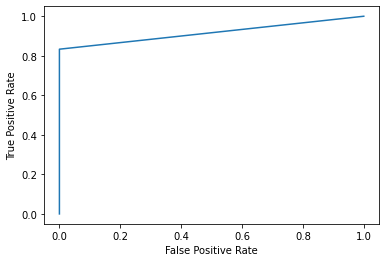

In [51]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()